#### Import Module

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from setting import *

#### Load Data

In [2]:
data = pd.read_csv('../../selected_data/2_content_bold_img/pca_512.csv')
data

,id,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_504,PC_505,PC_506,PC_507,PC_508,PC_509,PC_510,PC_511,PC_512,success_x
0,NMN2,-0.082151,-0.010538,0.208457,0.029076,-0.021858,-0.074188,-0.014138,0.008528,0.022980,...,-0.006448,-0.007681,0.015980,0.016603,-0.007250,0.021574,0.001825,0.022546,0.012398,1
1,ZENLET-The-Dual,-0.117323,0.071536,-0.064201,0.010942,-0.009018,-0.010761,0.029502,-0.002384,-0.022347,...,0.007065,-0.012225,0.015967,0.000159,-0.002032,0.007288,0.007474,0.015575,-0.002352,1
2,hhl-penzhai,-0.041515,-0.006147,0.017914,-0.006457,-0.019678,-0.002125,-0.075267,0.038606,-0.024331,...,0.001002,-0.010164,0.012454,0.010944,-0.006521,0.001710,-0.003279,0.000046,-0.008943,1
3,scion-36,-0.066909,0.025730,0.010533,0.039264,0.027022,0.015264,-0.018303,-0.020967,-0.012270,...,-0.005258,-0.001248,-0.001951,-0.000366,0.024558,0.001487,0.008566,-0.008634,0.002629,1
4,amt-cube,-0.071397,0.021208,-0.060353,0.105774,-0.024726,-0.001215,-0.004758,0.060892,0.015558,...,-0.016897,-0.012456,-0.024038,0.012702,-0.007231,-0.027518,0.034122,-0.004608,-0.004990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5443,ryanxpkking,0.070786,-0.078314,-0.020037,-0.027158,-0.011579,0.003267,-0.008640,-0.006381,-0.056118,...,0.017634,-0.018131,0.006870,-0.016016,-0.056227,-0.003930,-0.037716,-0.026164,0.040048,0
5444,groundzero1,0.147999,-0.175684,-0.153478,0.101899,-0.145063,-0.034395,0.019084,-0.066756,0.338328,...,0.016330,-0.037261,-0.014208,-0.017063,-0.016799,-0.009170,0.024603,-0.015260,-0.019689,0
5445,rogerspace,0.123597,-0.143487,-0.062363,-0.017434,-0.053994,-0.038789,-0.000194,-0.021677,-0.039256,...,0.017804,-0.025034,-0.022554,0.000425,0.011207,0.004942,-0.006428,0.013733,-0.012571,0
5446,holidayy2013,0.080222,-0.073416,0.005973,-0.000313,0.006043,0.000412,0.008200,-0.046879,-0.038996,...,0.014650,0.021693,-0.026883,-0.014471,0.045448,-0.015185,-0.016680,0.029724,-0.014382,0


In [3]:
x_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]
y_data.value_counts()

success_x
1    4204
0    1244
Name: count, dtype: int64

In [4]:
# Normalize
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)

# --- Split Data ---
norm_train_x, norm_test_x, norm_train_y, norm_test_y = train_test_split(norm_x_data, y_data, test_size=0.3, random_state=30)
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=30)

# Undersample
sampler = RandomUnderSampler()
under_train_x, under_train_y = sampler.fit_resample(train_x, train_y)

# Undersample
sampler = RandomOverSampler()
over_train_x, over_train_y = sampler.fit_resample(train_x, train_y)

#### Naive Bayes
> ref: https://scikit-learn.org/stable/modules/naive_bayes.html
* 模型選擇： Complement NB（不可使用負數，需先經過正規化）
* 使用資料：正規化後資料

---- Normalized Data ----
Accuracy: 0.66
Recall: 0.68
Precision: 0.85
F1-Score: 0.75
F0.5-Score: 0.81
F0.3-Score: 0.83


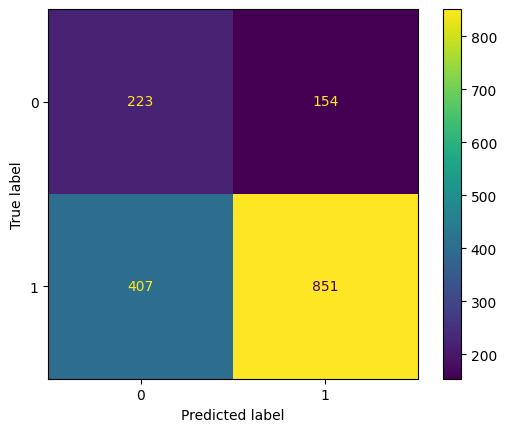

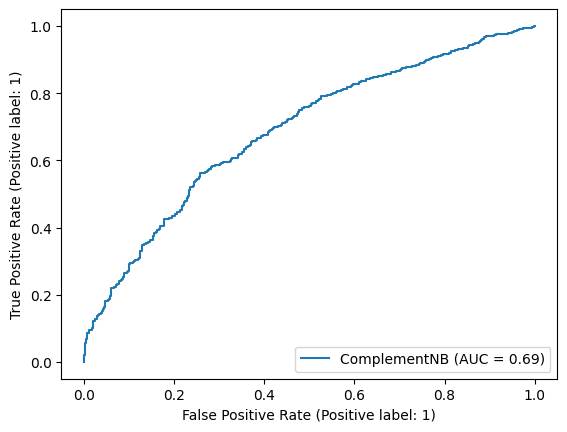

In [5]:
print('---- Normalized Data ----')

model = ComplementNB()
model.fit(norm_train_x, norm_train_y)

pred_y = model.predict(norm_test_x)

result_report(model, norm_test_x, norm_test_y, pred_y)

#### Logistic Regression
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 模型選擇： Logistic Regression
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.77
Recall: 1.0
Precision: 0.77
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.78


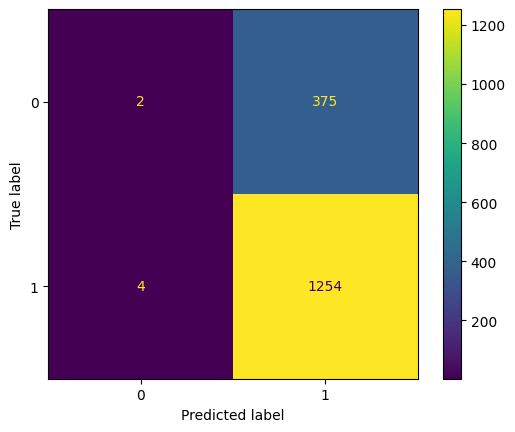

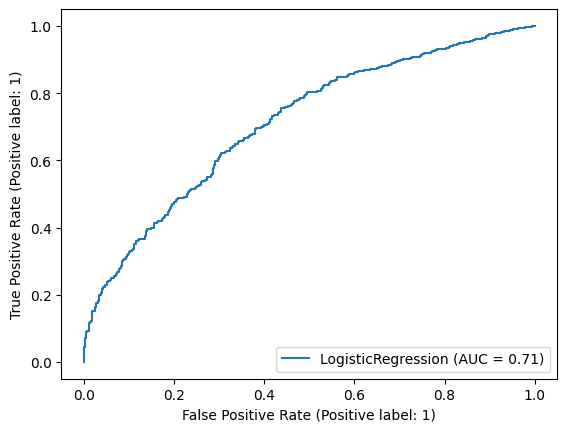

---- Under Sample Data ----
Accuracy: 0.61
Recall: 0.58
Precision: 0.86
F1-Score: 0.7
F0.5-Score: 0.79
F0.3-Score: 0.83


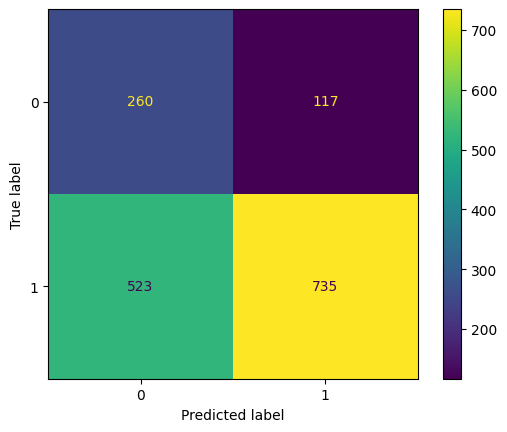

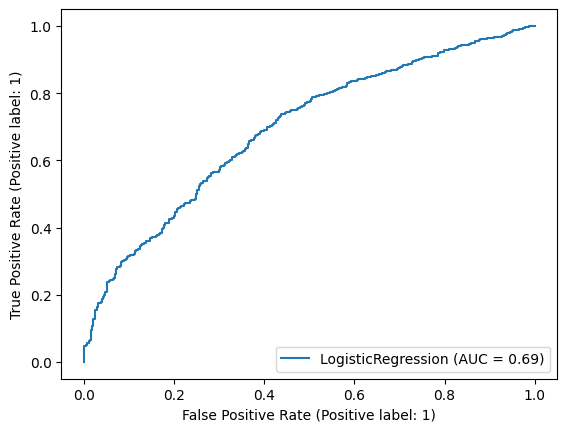

---- Over Sample Data ----
Accuracy: 0.68
Recall: 0.7
Precision: 0.86
F1-Score: 0.77
F0.5-Score: 0.82
F0.3-Score: 0.84


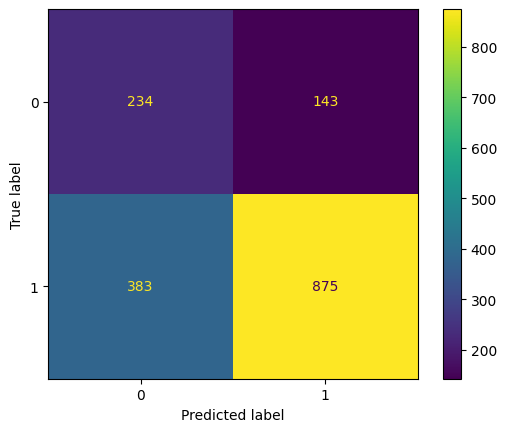

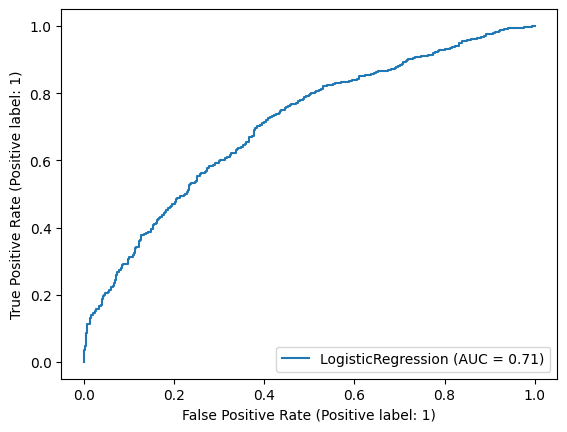

In [6]:
print('---- Original Data ----')
model = LogisticRegression()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = LogisticRegression()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = LogisticRegression()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### SVM
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* 模型選擇：SVC
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.77
Recall: 1.0
Precision: 0.77
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.79


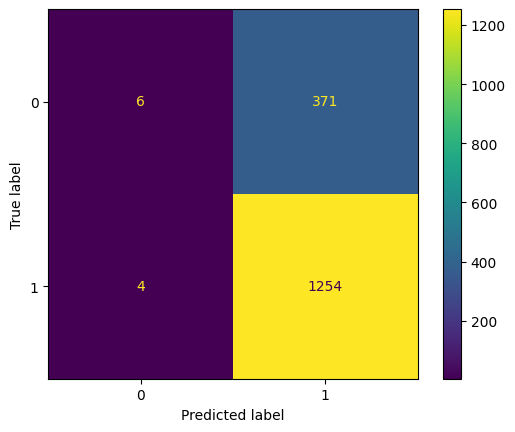

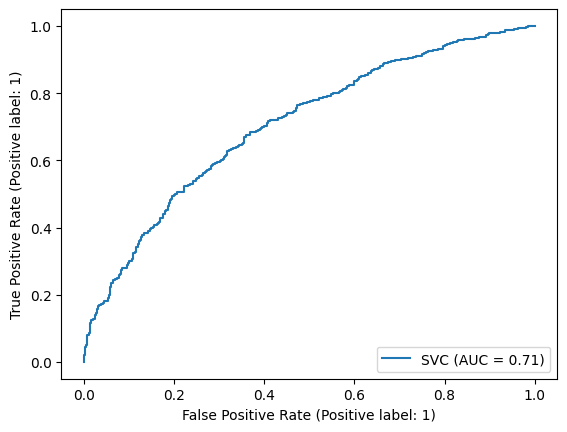

---- Under Sample Data ----
Accuracy: 0.61
Recall: 0.59
Precision: 0.85
F1-Score: 0.7
F0.5-Score: 0.78
F0.3-Score: 0.82


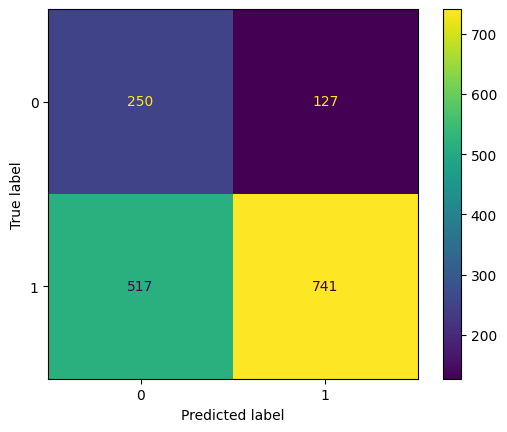

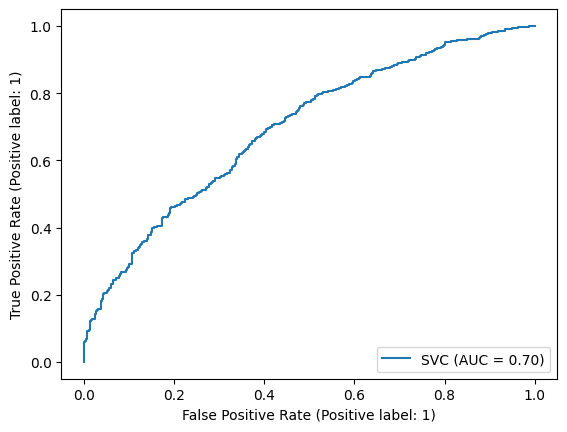

---- Over Sample Data ----
Accuracy: 0.74
Recall: 0.85
Precision: 0.82
F1-Score: 0.83
F0.5-Score: 0.83
F0.3-Score: 0.82


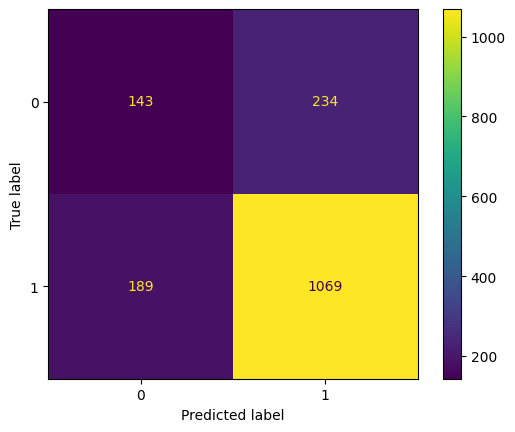

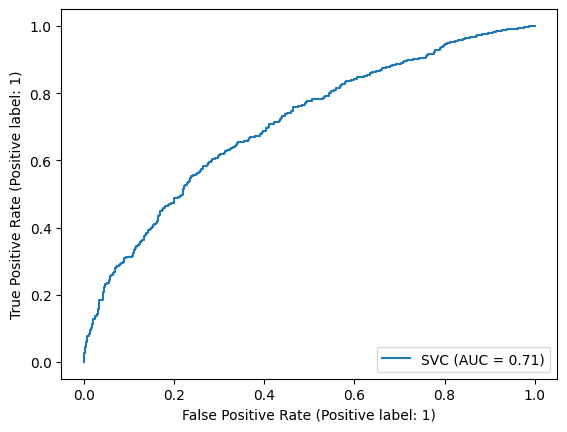

In [7]:
print('---- Original Data ----')
model = SVC()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = SVC()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = SVC()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### Random Forest

> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* 模型選擇： Random Forest
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.77
Recall: 0.99
Precision: 0.77
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.78


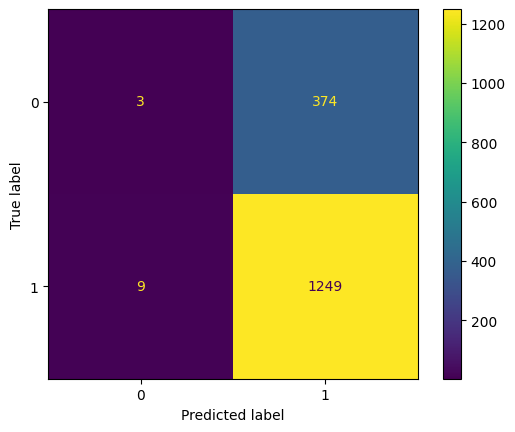

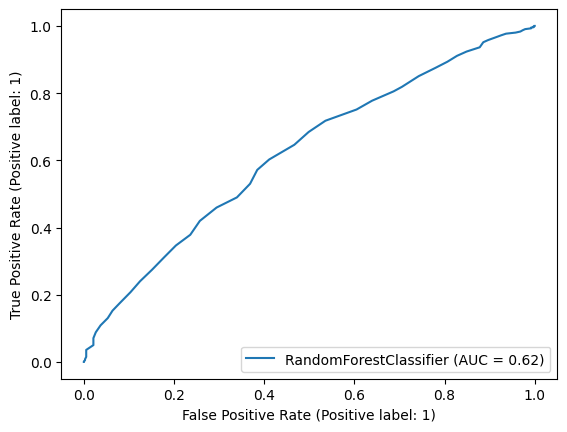

---- Under Sample Data ----
Accuracy: 0.56
Recall: 0.54
Precision: 0.83
F1-Score: 0.65
F0.5-Score: 0.75
F0.3-Score: 0.8


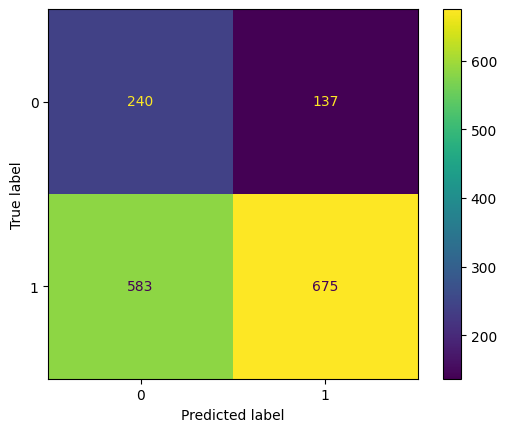

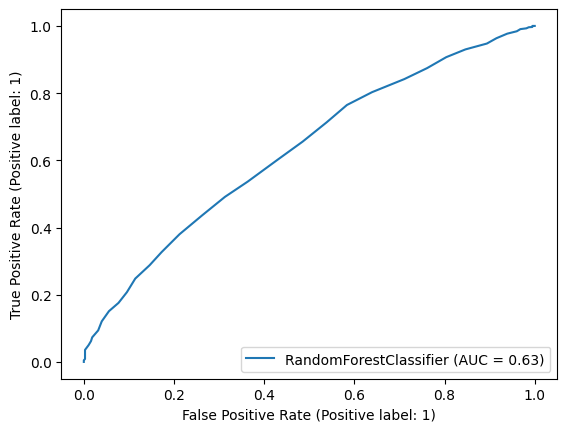

---- Over Sample Data ----
Accuracy: 0.77
Recall: 1.0
Precision: 0.77
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.78


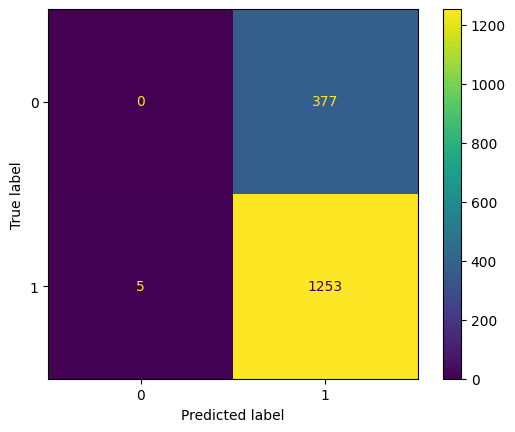

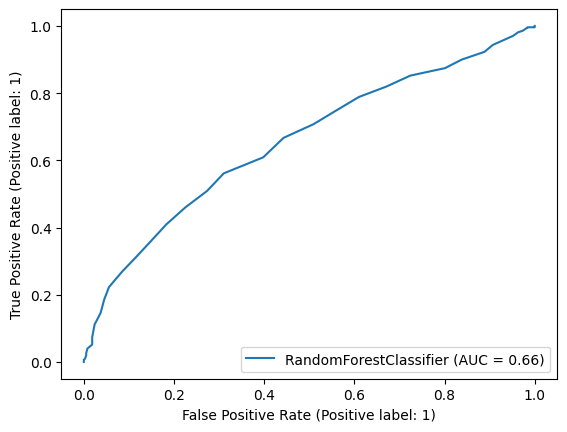

In [8]:
print('---- Original Data ----')
model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = RandomForestClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = RandomForestClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### XGBoost
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* 選擇模型：GradientBoostingClassifier
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.77
Recall: 0.98
Precision: 0.78
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.79


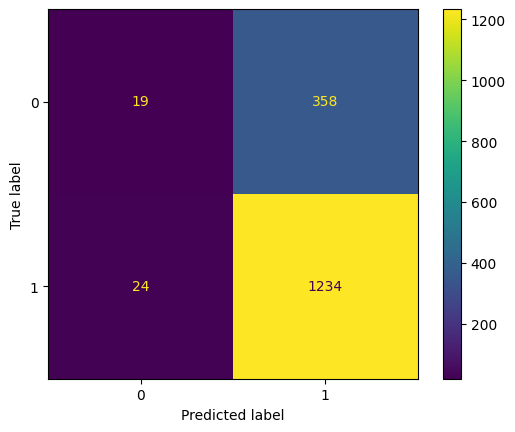

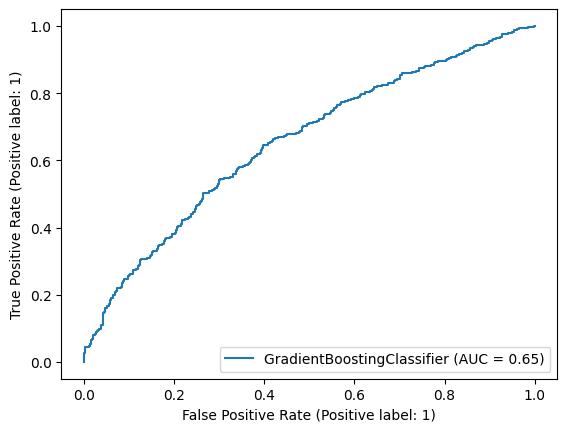

---- Under Sample Data ----
Accuracy: 0.61
Recall: 0.61
Precision: 0.85
F1-Score: 0.71
F0.5-Score: 0.79
F0.3-Score: 0.82


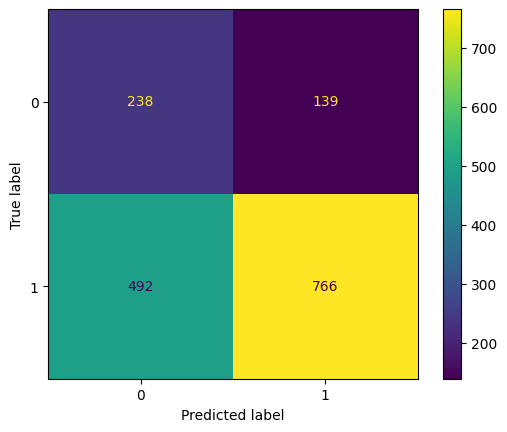

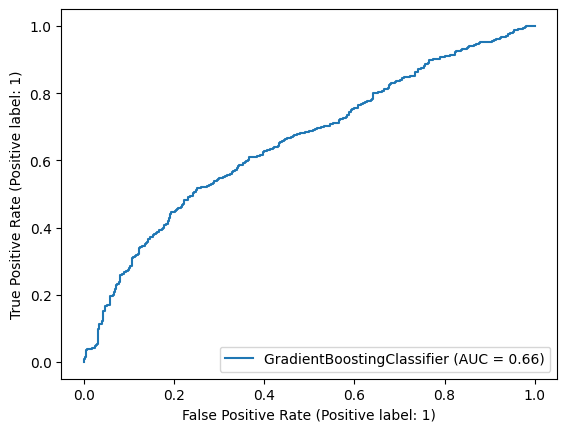

---- Over Sample Data ----
Accuracy: 0.69
Recall: 0.79
Precision: 0.8
F1-Score: 0.8
F0.5-Score: 0.8
F0.3-Score: 0.8


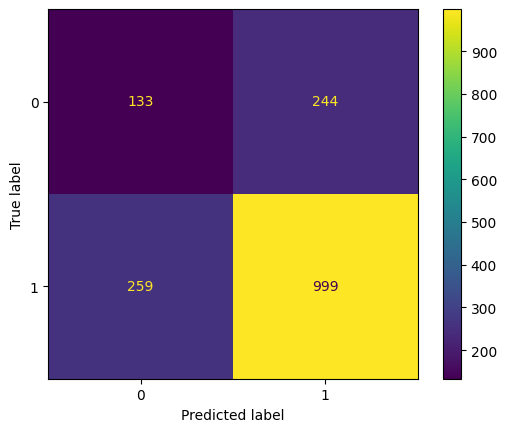

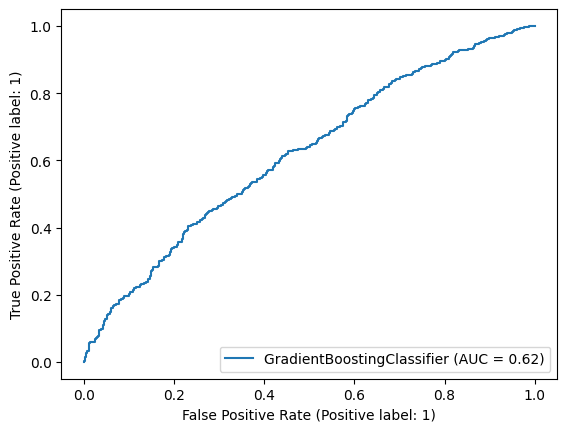

In [9]:
print('---- Original Data ----')
model = GradientBoostingClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = GradientBoostingClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = GradientBoostingClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)
